## To build a logistic regression model to assign a lead score between 0 and 100 to each lead, we'll follow these steps

### Data Preprocessing:

Handle missing values and 'Select' values.
Encode categorical variables.
Scale numerical features.

### Model Building:

Split the data into training and testing sets.
Train a logistic regression model.

### Model Evaluation:

Evaluate the model performance using various metrics.
Calculate the lead score and interpret the results.

### Assigning Lead Scores:

Use the logistic regression model to predict probabilities for each lead.
Scale these probabilities to a 0-100 range.

## Step 1: Data Preprocessing

### 1.1 Importing Necessary Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


### 1.2 Loading the Data

In [18]:
data = pd.read_csv('leads.csv')


### 1.3 Handling Missing Values and Categorical Levels

Replace 'Select' with NaN and drop columns with high percentage of missing values.
Drop rows with missing values for simplicity.

In [19]:
data.replace('Select', np.nan, inplace=True)
data.drop(columns=['Lead Number', 'Prospect ID'], inplace=True)  # Dropping non-informative columns
data.dropna(thresh=data.shape[1]*0.7, axis=1, inplace=True)  # Drop columns with more than 30% missing values
data.dropna(inplace=True)  # Drop rows with any missing values


### 1.4 Encoding Categorical Variables

We will use OneHotEncoder for categorical variables and scale numerical variables using StandardScaler.

## Step 2: Model Building

### 2.1 Splitting the Data

In [20]:
X = data.drop('Converted', axis=1)
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2.2 Creating Preprocessing Pipelines

In [21]:
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### 2.3 Training the Logistic Regression Model

In [22]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalVisits',
                                                   'Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Lead Origin', 'Lead Source',
                                                   'Do Not Email',
                                                   'Do Not Call',
                                                   'Last Activity', 'Country',
                                                   'Specialization'...
                                                   'Receive More Updates About '
                                                   'Our Courses',
                                                   'Tags', 'Lead Quality',
                                                   'Update me on Supply Chain '
                                                   'Content',
                                                   'Get updates on DM Content',
                                                   'Lead Profile', 'City',
                                                   'Asymmetrique Activity '
                                                   'Index',
                                                   'Asymmetrique Profile Index',
                                                   'I agree to pay the amount '
                                                   'through cheque',
                                                   'A free copy of Mastering '
                                                   'The Interview',
                                                   'Last Notable Activity'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

## Step 3: Model Evaluation

### 3.1 Predictions and Performance Metrics

Accuracy: 0.9222222222222223
Precision: 0.9538461538461539
Recall: 0.9393939393939394


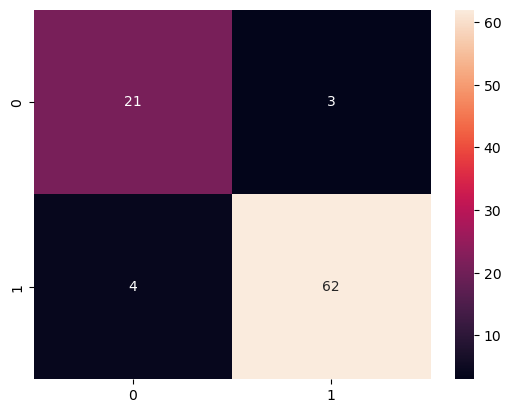

In [23]:
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


### 3.2 ROC-AUC Score

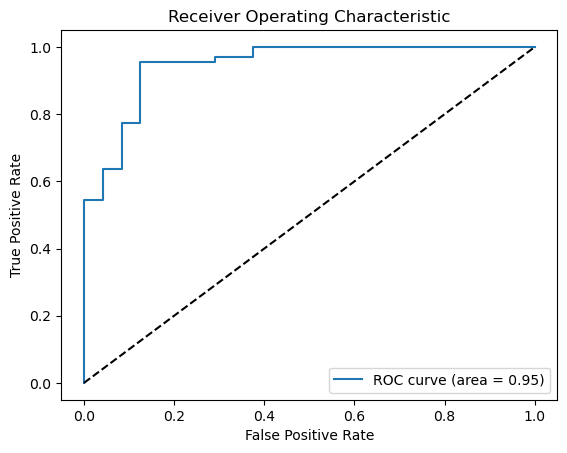

In [24]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()


## Step 4: Assigning Lead Scores

### 4.1 Predicting Probabilities for Each Lead

In [25]:
lead_scores = clf.predict_proba(X)[:, 1]
data['Lead_Score'] = lead_scores * 100


### 4.2 Display Lead Scores

In [26]:
print(data[['Lead_Score', 'Converted']].head())


    Lead_Score  Converted
6    98.102362          1
22   96.791412          1
27   99.207342          1
37   93.296750          1
39   98.422562          1


# Overall Implementation of Model

Accuracy: 0.9222222222222223
Precision: 0.9538461538461539
Recall: 0.9393939393939394


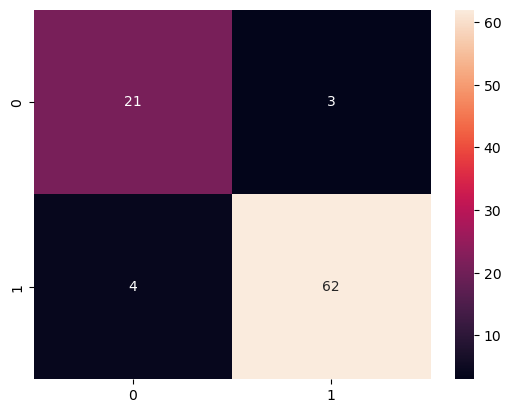

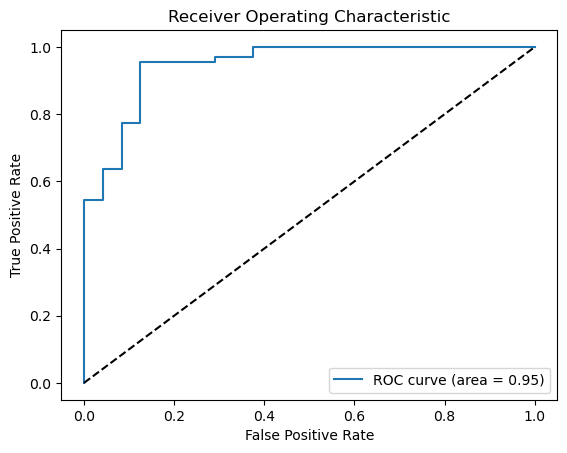

    Lead_Score  Converted
6    98.102362          1
22   96.791412          1
27   99.207342          1
37   93.296750          1
39   98.422562          1


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('leads.csv')

# Preprocess the data
data.replace('Select', np.nan, inplace=True)
data.drop(columns=['Lead Number', 'Prospect ID'], inplace=True)
data.dropna(thresh=data.shape[1]*0.7, axis=1, inplace=True)
data.dropna(inplace=True)

# Split the data
X = data.drop('Converted', axis=1)
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipelines
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train the logistic regression model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

clf.fit(X_train, y_train)

# Model evaluation
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# ROC-AUC Score
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()

# Assigning lead scores
lead_scores = clf.predict_proba(X)[:, 1]
data['Lead_Score'] = lead_scores * 100

# Display lead scores
print(data[['Lead_Score', 'Converted']].head())


### To find the top three variables in your model which contribute most towards the probability of a lead getting converted

In [28]:
import numpy as np
import pandas as pd

# Get the names of the columns after preprocessing
feature_names = np.array(X_train.columns)
categorical_feature_names = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([numerical_features, categorical_feature_names])

# Get the coefficients from the logistic regression model
coefficients = clf.named_steps['classifier'].coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Take the absolute value of the coefficients to identify the most important features
feature_importance['Importance'] = feature_importance['Coefficient'].abs()

# Sort the features by their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top three features
print(feature_importance.head(3))


                                     Feature  Coefficient  Importance
77  Tags_Will revert after reading the email     2.768790    2.768790
71          Tags_Interested in other courses    -1.691345    1.691345
67                   Tags_Closed by Horizzon     1.355475    1.355475


### To find the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('leads.csv')

# Preprocess the data
data.replace('Select', np.nan, inplace=True)
data.drop(columns=['Lead Number', 'Prospect ID'], inplace=True)
data.dropna(thresh=data.shape[1]*0.7, axis=1, inplace=True)
data.dropna(inplace=True)

# Split the data
X = data.drop('Converted', axis=1)
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipelines
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train the logistic regression model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

clf.fit(X_train, y_train)

# Get the names of the columns after preprocessing
categorical_feature_names = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Get the coefficients from the logistic regression model
coefficients = clf.named_steps['classifier'].coef_[0]

# Combine categorical feature names and their corresponding coefficients
categorical_importance = pd.DataFrame({'Feature': categorical_feature_names, 'Coefficient': coefficients[len(numerical_features):]})

# Take the absolute value of the coefficients to identify the most important features
categorical_importance['Importance'] = categorical_importance['Coefficient'].abs()

# Sort the features by their importance
categorical_importance = categorical_importance.sort_values(by='Importance', ascending=False)

# Display the top three categorical features
print(categorical_importance.head(3))


                                     Feature  Coefficient  Importance
74  Tags_Will revert after reading the email     2.768790    2.768790
68          Tags_Interested in other courses    -1.691345    1.691345
64                   Tags_Closed by Horizzon     1.355475    1.355475
